## Linear Regression
-------------------------------------------------------------------------------------

Linear Regresion หรือ Ordinary Least Square เป็น model ที่ใช้กันมากว่าร้อยปี และนิยมใช้กันอย่างแพร่หลาย ซึ่งถูกจัดอยู่ในกลุ่มที่เรียกว่า Supervised Learning เพื่อใช้ในการ estimate ค่าต่างๆ (quatitative response) จากตัวแปร(Predictors, Independent vars)ที่มีความสัมพันธ์แบบเชิงเส้น โดยแสดงเป็นสมการได้ดังนี้

$$Y = \beta + \beta1*X $$

ใน post นี้ ผมจะใช้ Linear Regession โดยใช้ Advertise data (ISL book chapter3) ในการสร้าง Model (สมการเชิงเส้น) เพื่อคาดการ์ณ ยอดขายจากยอดใช้จ่ายสื่อบนวิทยุ โทรทัศน์ และหนังสือพิมพ์ โดยสมการหรือโมเดลที่คาดว่าจะได้คือ
$$ Sales = \beta + \beta1*TV + \beta2*Radio + \beta3*Newspaper$$

โดยตัว model ในขณะสร้าง จะพยายามหาค่า $\beta0 ... \beta n$ เพื่อลดค่า Error ให้ได้มากที่สุด หรือกล่าวอีกในนึงคือยอดขายที่คาดการ์ณกับยอดขายจริงต้องใกล้เคียงกันให้มากที่สุด ซึ่งวิธีการที่นิยมที่สุดเรียกว่า Lease Square criterion

เราจะใช้ DataSci iterative process ดังนี้
1. Understanding and defining problem
2. Understanding data via exploratory analysis
3. Data Preparation: Data cleasing & Handling missing value
4. Build model
5. Evaluate model

##1. Understanding and defining problem
การทำความเข้าใจและกำหนดปัญหานั้นได้มีบทบาทสำคัญอย่างมากในการแก้ปัญหา ซึ่่งต้องใช้ควาคิดสร้างสรรค์และความเข้าใจใน business domain ในการเฟรมคำถามเพื่อนำไปสู่คำตอบได้อย่างถูกต้อง ในกรณีของตัวอย่าง Advertise นี้ เรามาลองตั้งคำถามดังนี้
1. สื่อแต่ละตัวมีความสัมพันธ์กับยอดขายหรือไม่ (Is there a relationship between response and variables?)
2. ความสัมพันธ์ระหว่างสื่อกับยอดขายนั้นมากน้อยแค่ไหน (How strong is the relationship?)
3. แต่ละสื่อมีส่วนร่วมกับยอดขายแค่ไหน (How does each media contribute to sales?)
4. ยอดขายสามารถคาดการ์ณด้วยความสัมพันธ์เชิงเส้น (Is relationship linear?)


##2. Understanding data via exploratory data analysis (EDA)
เป้าหมายของ EDA คือ เพื่อ
1. ได้ข้อมูลเชิงลึก (Insight) หรือ pattern
2. ตรวจสอบ Outlier ซึ่งอาจเกิดจากความผิดขณะจัดเก็บขอมูล
3. เป็นข้อมูลในการพิจารณาเลือก Feature variable เพื่อใช้กับ machine learning
4. ให้เกิดความเชื่อมั่นในตัวข้อมูลว่าเหมาะสมต่อการนำไปใชสร้างโมเดลได้อย่างถูกต้อง


In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set defualt figsize to 10 x 8

In [3]:
# Advertise data from URL : 
url = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
advertise = pd.read_csv(url, index_col=0)

In [4]:
# dimenstion size (nrow, ncol)
advertise.shape

(200, 4)

In [5]:
# print basic summary
advertise.describe()
# TV has largest spending on the average compared to the other medias

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# check each column if it contatins missing value

def check_null(df):
    for col_name in df.columns:
        sum = df[col_name].isnull().sum()
        print col_name, sum


check_null(advertise)
# none of columns contain missing values

TV 0
Radio 0
Newspaper 0
Sales 0


dataset ที่ใช้ ค่อนข้างจะสมบูรณ์ ไม่มี error หรือ missing value ซึ่งสามารถนำไปวิเคราะห์ต่อได้ทันที แต่ในโลกของธุรกิจจริง ข้อมูลนั้นจะมี error และ missing value ค่อนข้างมาก จึงต้องระมัดระวังและใส่ใจในขั้นตอนนี้ให้มาก เพื่อการวิเคราะห์และสร้างโมเดลใด้ถูกต้องขึ้น

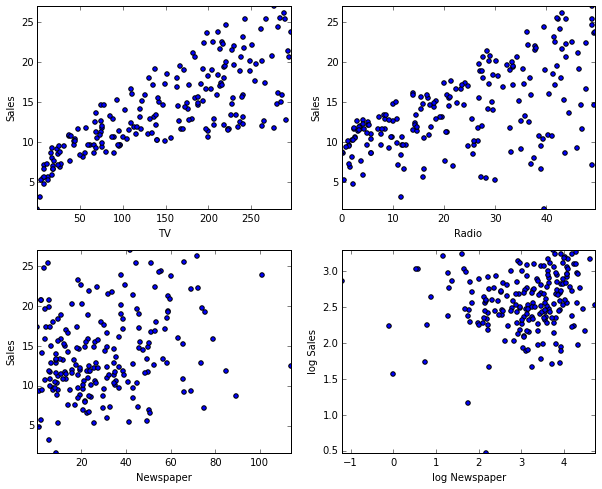

In [7]:
# plot scatter to see relationship between varirables

# setup figure
plt.figure(figsize = (10,8))

# scatter plot of TV (x) and Sales (y)
ax1 = plt.subplot(221)
ax1.scatter(advertise.TV, advertise.Sales,)
ax1.set_ylim(advertise.Sales.min(), advertise.Sales.max())
ax1.set_xlim(advertise.TV.min(), advertise.TV.max())
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

# scatter plot of Raido (x) and Sales (y)
ax2 = plt.subplot(222)
ax2.scatter(advertise.Radio, advertise.Sales,)
ax2.set_ylim(advertise.Sales.min(), advertise.Sales.max())
ax2.set_xlim(advertise.Radio.min(), advertise.Radio.max())
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

# scatter plot of Newspaper (x) and Sales (y)
ax3 = plt.subplot(223)
ax3.scatter(advertise.Newspaper, advertise.Sales,)
ax3.set_ylim(advertise.Sales.min(), advertise.Sales.max())
ax3.set_xlim(advertise.Newspaper.min(), advertise.Newspaper.max())
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')

ax4 = plt.subplot(224)
ax4.scatter(np.log(advertise.Newspaper), np.log(advertise.Sales))
ax4.set_ylim(np.log(advertise.Sales.min()), np.log(advertise.Sales.max()))
ax4.set_xlim(np.log(advertise.Newspaper.min()), np.log(advertise.Newspaper.max()))
ax4.set_xlabel('log Newspaper')
ax4.set_ylabel('log Sales')

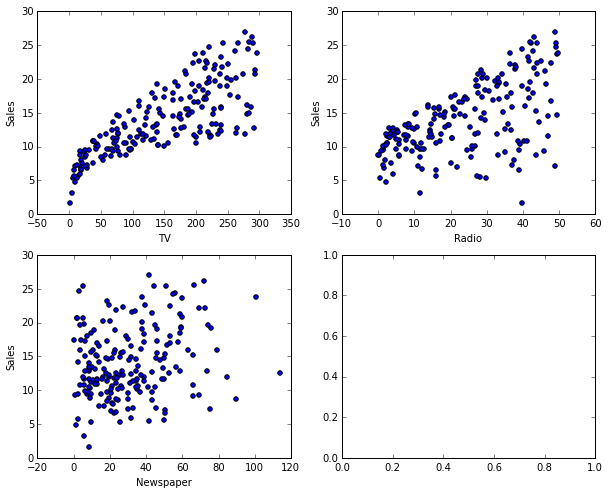

In [10]:
# setup figure
# pandas has built-in matplotlib where can be accessed directly as seen below
fig, axes = plt.subplots(nrows=2, ncols=2)
advertise.plot(kind = 'scatter', x= 'TV', y= 'Sales', ax= axes[0,0])
advertise.plot(kind = 'scatter', x= 'Radio', y= 'Sales', ax= axes[0,1])
advertise.plot(kind = 'scatter', x= 'Newspaper', y= 'Sales', ax= axes[1,0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE04F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E2987F0>]], dtype=object)

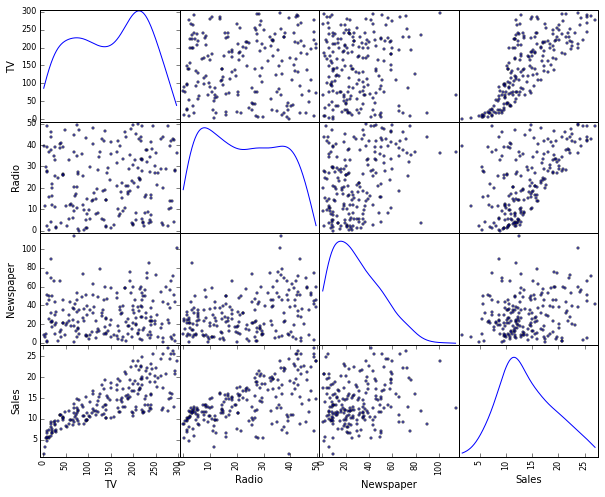

In [11]:
from pandas.tools.plotting import scatter_matrix

# plot scatter maxtrix of advertise data
scatter_matrix(advertise, alpha=0.6, diagonal='kde')

# to visualize realationship across dataframe via scatter_matrix

{'boxes': [<matplotlib.lines.Line2D at 0x19e0fcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x19ea59b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19eb0a58>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x19eb04e0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x19e0ff28>,
  <matplotlib.lines.Line2D at 0x19ee5198>]}

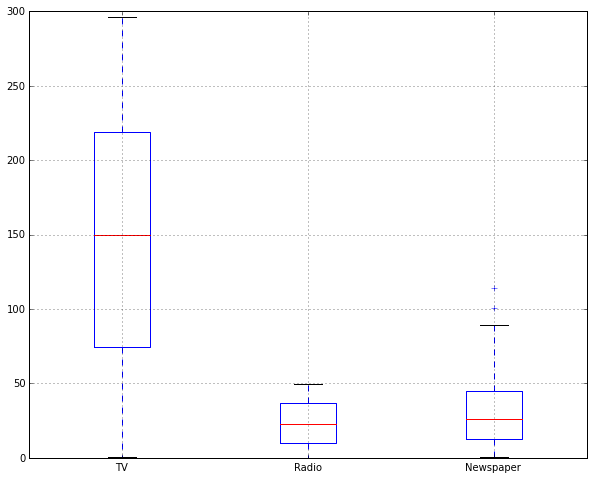

In [12]:
# plot boxplot
advertise.boxplot(column= ['TV', 'Radio','Newspaper'],return_type= 'dict')

# clealy seen that the company spends most money on TV due to high airtime fee and more and wide audiences reached 
# that the others

# boxplot can be used to spot outliner. Newspaper has outliners as you can see + +

In [13]:
# Correlation matrix plot used to compare how strong is the realationship with others
advertise.corr()

# order by strongest to weakest corrleation with Sales
# TV > Radio > Newspaper

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [14]:
# build Linear Regresstion 
import statsmodels.api as sm

col_name_predict = ['TV', 'Radio', 'Newspaper']
y = advertise['Sales'] # response
X = advertise[col_name_predict] # extract predictor and store in X
X = sm.add_constant(X) # add constant term to the predictor
X.head()

,const,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [15]:
est = sm.OLS(y, X) # iniitale OLS object called est
est = est.fit() # fit OLS model to data (train model)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 27 Aug 2015   Prob (F-statistic):           1.58e-96
Time:                        11:43:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

จากตารางข้างบน ขอสรุป Definition ที่สำคัญดังนี้
<li><b>R-squared</b> คือ ประสิทธิภาพของ Model ที่เราสร้างนั้น มีความสามารถในการ capture variance ของ reponse แค่ไหน โดยค่าของ R อยู่ระหว่าง 0 ถึง 1 ซึ่งค่ายิ่งมาก performance ยิ่งดี หมายเหตุ <a href='http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit'>เพิ่มเติม</a>
<li><b>P-value</b> คือ การเทสความน่าจะเป็นของ altanative-hypothesis ซึ่งในที่นี้คือ $\beta$ != 0 ว่า มีความน่าจะเป็นมากน้อยแค่ไหนที่ความสัมพันธ์ระหว่าง Sales กับ แต่ละ media budget นั้นเกิดขึ้นโดยบังเอิญ โดยค่าของ p ควรจะ < 0.05 จึงจะถือได้ว่าความสัมพันธ์ที่เกิดขึ้นนัั้นมีนัยยะ


In [16]:
# for R users who prefer way of adding fomular to the model
import statsmodels.formula.api as smf

# formular response ~ predictors (R way)
est2 = smf.ols('Sales ~ TV', advertise).fit() # use only TV as predictor
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 27 Aug 2015   Prob (F-statistic):           1.47e-42
Time:                        11:43:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

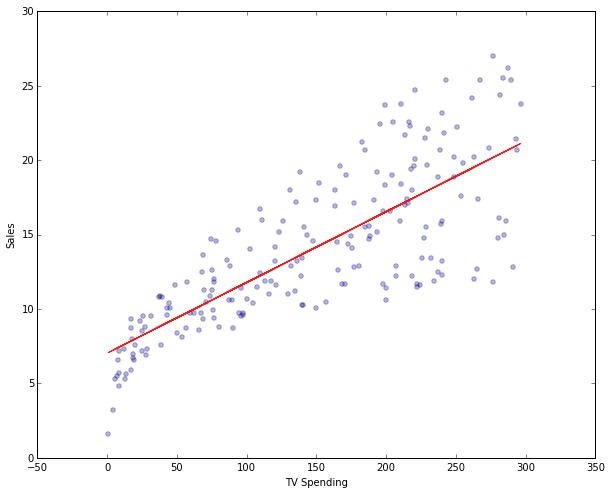

In [17]:
# plot scatter

y_hat = est2.predict(sm.add_constant(advertise.TV))

plt.scatter(advertise.TV, advertise.Sales, alpha = 0.3)
plt.xlabel("TV Spending")
plt.ylabel("Sales")
plt.plot(advertise.TV, y_hat, 'r', alpha = 0.9) # add regrestion line 

## Conclusion
จากที่ได้สร้าง model est รูปสมการจะเขียนได้เป็น

<i><b>Sales = 2.9389 + 0.0458*TV + 0.1885*Radio - 0.001*Newspaper<b></i>

สามารถสรุปตีความสอดคล้องกับธุรกิจได้ดังนี้
<li> ถ้าเรา fix การใช้จ่ายด้านโฆษณาทางวิทยุและหนังสือพิมไว้ การเพิ่มค่าใช้จ่ายโฆษณาทางทีวี $1000 ส่งผลให้ยอดขายเพิ่มขึ้นโดยเฉลี่ยย 45.8 หน่วย
<li> หรือ ถ้าบริษัทไม่ลงโฆษณาใดๆเลย ยอดขายโดยเฉลี่ยจะอยู่ที่ 3 หน่วย
<li> จากข้อมูลสรุปตารางด้านบน Newspaper ที่มีค่า P-value > 0.05 ซึ่งไม่มีนัยยะสำคัญทางสถิติที่แสดงให้เห็นว่า Relationship รหะว่าง Salse และ Newspaper budget is TRUE หรือกล่าวอีกนัยนึงก็คือ <b>การใช้จ่ายค่าโฆษณาบนหนังสือพิมพืไม่มีผลทำให้ยอดขายเพิ่มขึ้นแต่อย่างใด</b> 

<b>ข้อสังเกตุ</b> ค่า Corr ระหว่าง Newspaper budget และ Sales = 0.23  และระหว่าง Newspaper และ Radio = 0.35 บางท่านอาจส่งสัยว่าทำไม Newspaper ถึงไม่มีผลต่อยอดขาย ในเมื่อดูจาก scatter plot เห็นว่ามียอดขายมีแน้วโน้มเพิ่มขึ้น ถ้าเพิ่มงบโฆษณาหนังสือพิมพ์  สรุปให้เข้าใจได้ดังนี้
<li> <b>Correlation does not imply causation</b> หมายความว่า ถึงแม้มีแน้วโน้มในทางเดียวกันหรือ แต่ไม่ได้หมายความว่าสาเหตุการเพิ่มขึ้นของยอดขาย มาจากการเพิ่มงบโฆษณาหนังสือพิมพ์ ยกตัวอย่างเช่น ยอดขายไอติมตามริมชายหาด พบว่ามีความสัมพันธ์ในทางเดียวกันกับ จำนวนฉลามโจมตีมนุษย์ บางคนอาจสรุปว่าถ้าต้องลดการโจมตีของฉลามลง อาจต้องสั่งให้ห้ามขายไอติมในบริเวณนั้น  ซึ่งฟังดูแล้วไม่ make sense เท่าไหร่ เหตุผลจริงๆก็คือ มีตัวแปรตัวอื่นที่ที่เป็นสาเหตุให้ไอติมขายดี และจำนวนของการโจมตีจากฉลามเพิ่มขึ้น ก็คืออุณหภูมิต่างหาก  อุณหภูมิที่สูงขึ้นส่งผลให้คนมาเที่ยวชายหาดมากขึ้น ยอดขายไอติมก็เพิ่มขึ้น จำนวนคนเล่นน้ำมากขึ้นและนำไปสู่่จำนวนเหตุการณ์ที่ฉลามโจมตีมนุษย์มากขึ้น

ข้อดีของการใช้ Linear Regression มาประยุกต์ใช้แก้ปัญหาทางธุรกิจ คือ
<li>ใช้งานง่าย ไม่มี parameter ซับซ้อนเพื่อ optimize
<li>ผลลัพท์สามารถตีความให้สอดคล้องกับ business ได้ง่าย
<li>ประมวลผลได้เร็ว เนื่องจากอัลกอริทึมไม่ซับซ้อน

ข้อเสีย
<li>คาดการ์ณไม่ค่อยแม่นยำ เนื่องจากในโลกธุรกิจจริง หาได้ยากที่ข้อมุลจะมีความสัมพันธ์กันแบบเชิงเส้น
<li>อ่อนไหวต่อ noise หรือ outlier ทำให้เกิดการ์ณคาดการ์ผิดไปจากความเป็นจริงได้ง่าย
	